In [1]:
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import netCDF4
import os

# 1

In [2]:
treck = pd.read_excel('July.xlsx')

In [3]:
#treck
treck['Время'] = pd.to_datetime(treck['Время'], format='%d.%m.%Y %H:%M')
treck

,Время,Температура,Давление
0,2021-07-31 21:00:00,18.5,744.5
1,2021-07-31 18:00:00,21.0,743.5
2,2021-07-31 15:00:00,19.8,742.0
3,2021-07-31 12:00:00,16.0,740.1
4,2021-07-31 09:00:00,15.2,738.5
...,...,...,...
239,2021-07-01 12:00:00,23.6,754.3
240,2021-07-01 09:00:00,21.8,753.9
241,2021-07-01 06:00:00,16.9,753.1
242,2021-07-01 03:00:00,16.4,752.1


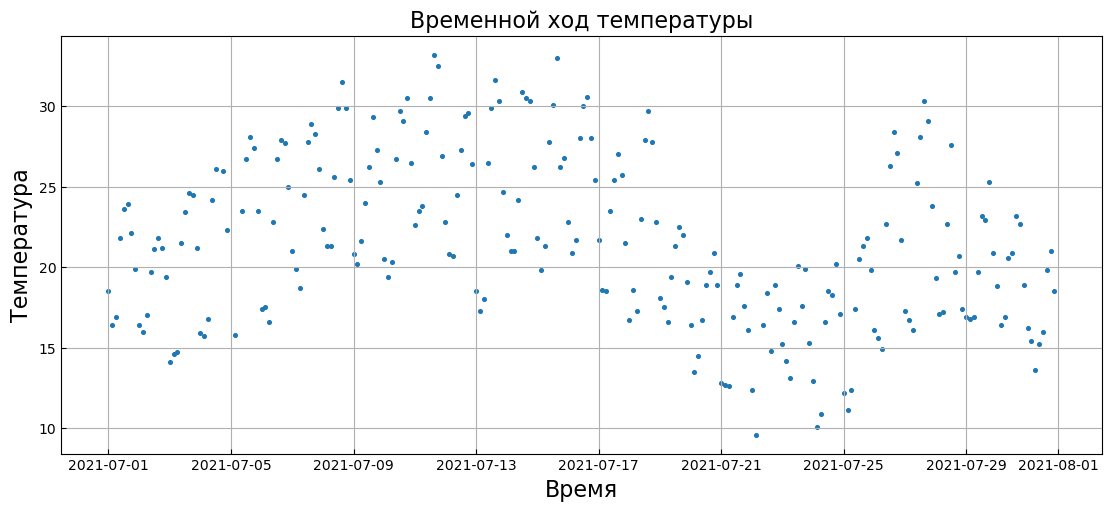

In [4]:
fig, ax = plt.subplots(figsize=(11,5), layout = 'constrained')

ax.scatter(treck['Время'],treck['Температура'], s = 7)#, label = 'Временной ход температуры')
ax.set_xlabel('Время', fontsize = 16)
ax.set_ylabel('Температура', fontsize = 16)



ax.grid()
#ax.legend(loc = 'upper right', fontsize = 14)
ax.tick_params(axis = 'both', direction = 'in')
ax.set_title('Временной ход температуры', fontsize = 16)

plt.show()

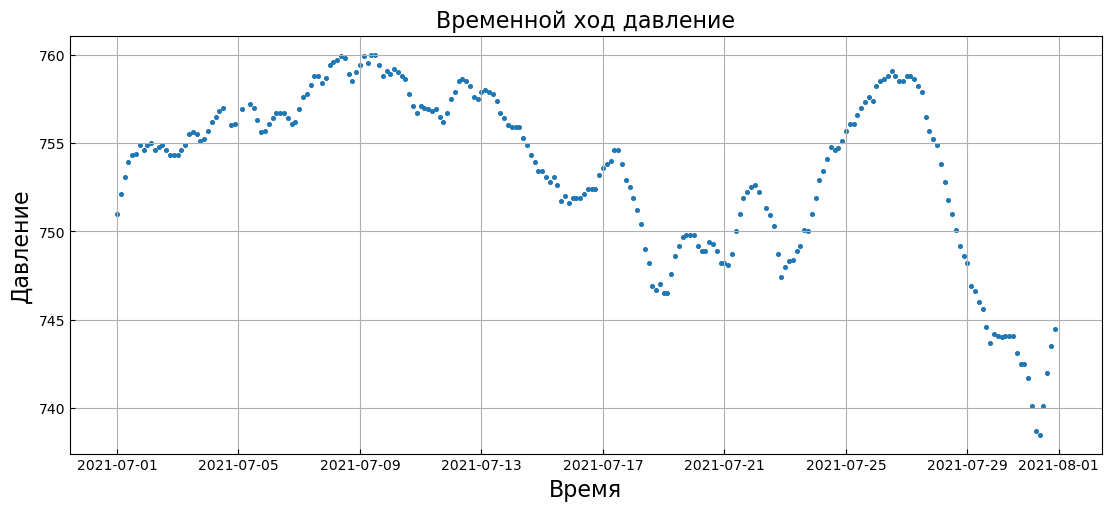

In [5]:
fig, ax = plt.subplots(figsize=(11,5), layout = 'constrained')

ax.scatter(treck['Время'],treck['Давление'], s = 7)#, label = 'Временной ход температуры')
ax.set_xlabel('Время', fontsize = 16)
ax.set_ylabel('Давление', fontsize = 16)



ax.grid()
#ax.legend(loc = 'upper right', fontsize = 14)
ax.tick_params(axis = 'both', direction = 'in')
ax.set_title('Временной ход давление', fontsize = 16)

plt.show()

# 2

In [6]:
sst = netCDF4.Dataset('sst.nc', mode="r")
print(sst.variables.keys())
sst['sst']

dict_keys(['anom', 'err', 'ice', 'lat', 'lon', 'sst', 'time', 'zlev'])


<class 'netCDF4._netCDF4.Variable'>
int16 sst(time, zlev, lat, lon)
    long_name: Daily sea surface temperature
    units: Celsius
    _FillValue: -999
    add_offset: 0.0
    scale_factor: 0.01
    valid_min: -300
    valid_max: 4500
unlimited dimensions: time
current shape = (1, 1, 720, 1440)
filling on

In [7]:
import matplotlib as mpl

In [8]:
x = np.array(sst['lon'][:])
y = np.array(sst['lat'][:])
z = np.array(sst['sst'][0,0,:,:])

print(z.shape)

xNew = np.linspace(-180, 180, len(x))
yNew = y
zNew = np.zeros(z.shape)
print(zNew.shape)
print(len(x))
zNew[:, 0:len(x)//2] = z[:, len(x)//2:]
zNew[:, len(x)//2:] = z[:, :len(x)//2]

(720, 1440)
(720, 1440)
1440


In [9]:
zNew[zNew == -999.0] = np.nan
# x = long(x)

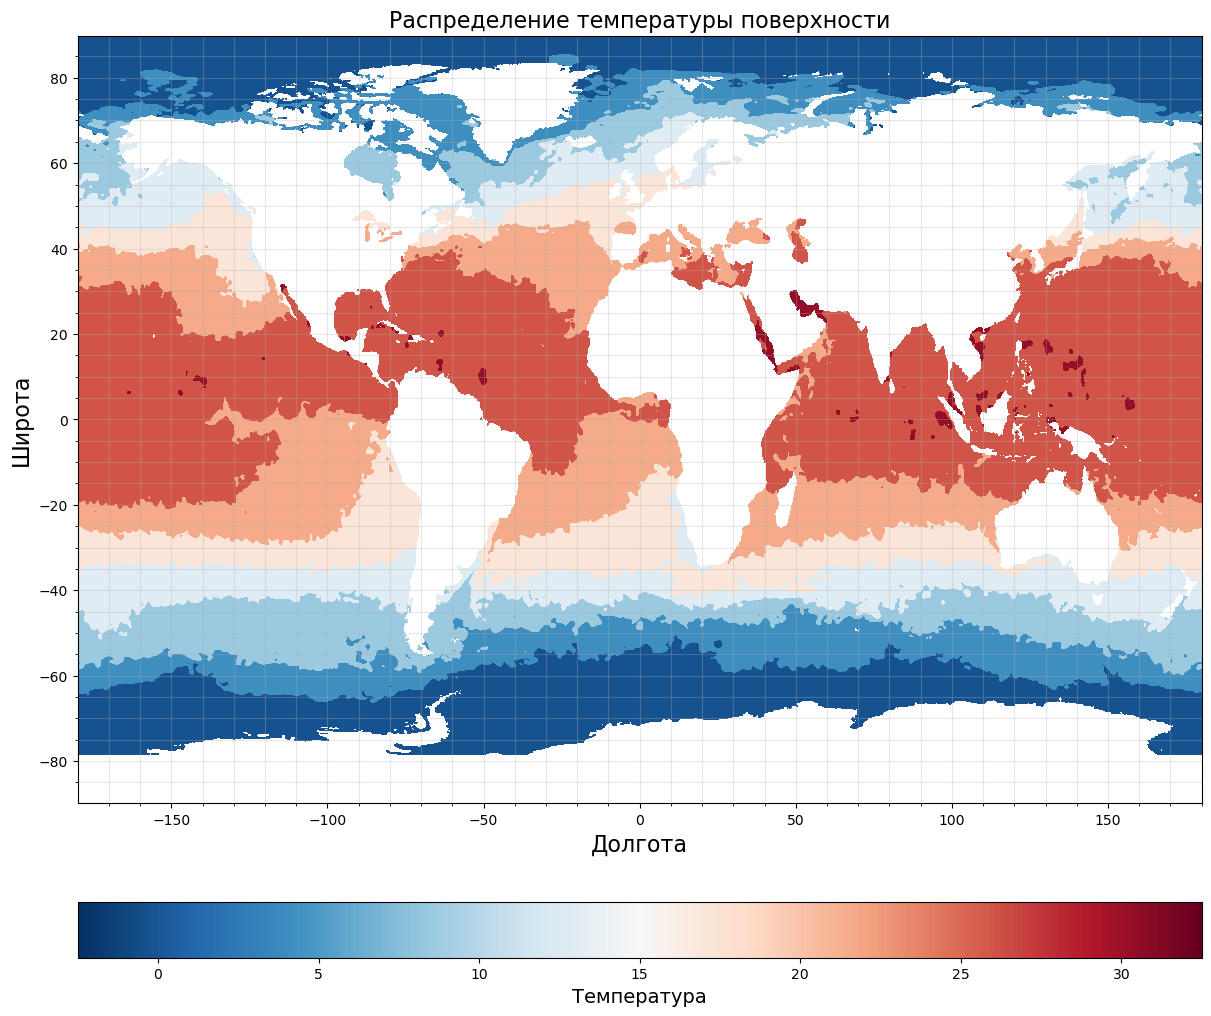

In [10]:
ax = plt.figure(figsize=(12,10), layout = 'constrained')
# xNew, yNew = np.meshgrid(xNew, yNew)
cs = plt.contourf(xNew,yNew,zNew, cmap='RdBu_r')
# cs = plt.pcolormesh(xNew,yNew,zNew)

norm= mpl.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
cb = ax.colorbar(sm,ax=plt.gca(),orientation='horizontal')
cb.set_label('Температура', fontsize = 14)
plt.xlabel('Долгота', fontsize = 16)
plt.ylabel('Широта', fontsize = 16)
plt.minorticks_on()
plt.grid(which = 'both', alpha = 0.3)
plt.title('Распределение температуры поверхности', fontsize = 16)
plt.show()

# 3

In [11]:
from netCDF4 import num2date

In [12]:
ice = netCDF4.Dataset('sea_ice.nc', mode="r")
print(ice.variables.keys())
ice['time']
ice['sea_ice_fraction']

dict_keys(['latitude', 'longitude', 'sea_ice_fraction', 'time'])


<class 'netCDF4._netCDF4.Variable'>
float32 sea_ice_fraction(time, latitude, longitude)
    units: 1
    _FillValue: nan
    standard_name: sea_ice_area_fraction
    long_name: Sea ice area fraction
unlimited dimensions: 
current shape = (7, 405, 624)
filling off

In [13]:
x = np.array(ice['longitude'][:])
y = np.array(ice['latitude'][:])
z = np.array(ice['sea_ice_fraction'][6,:,:])
t = num2date(ice['time'], 'seconds since 1970-01-01')
t = np.array(t)

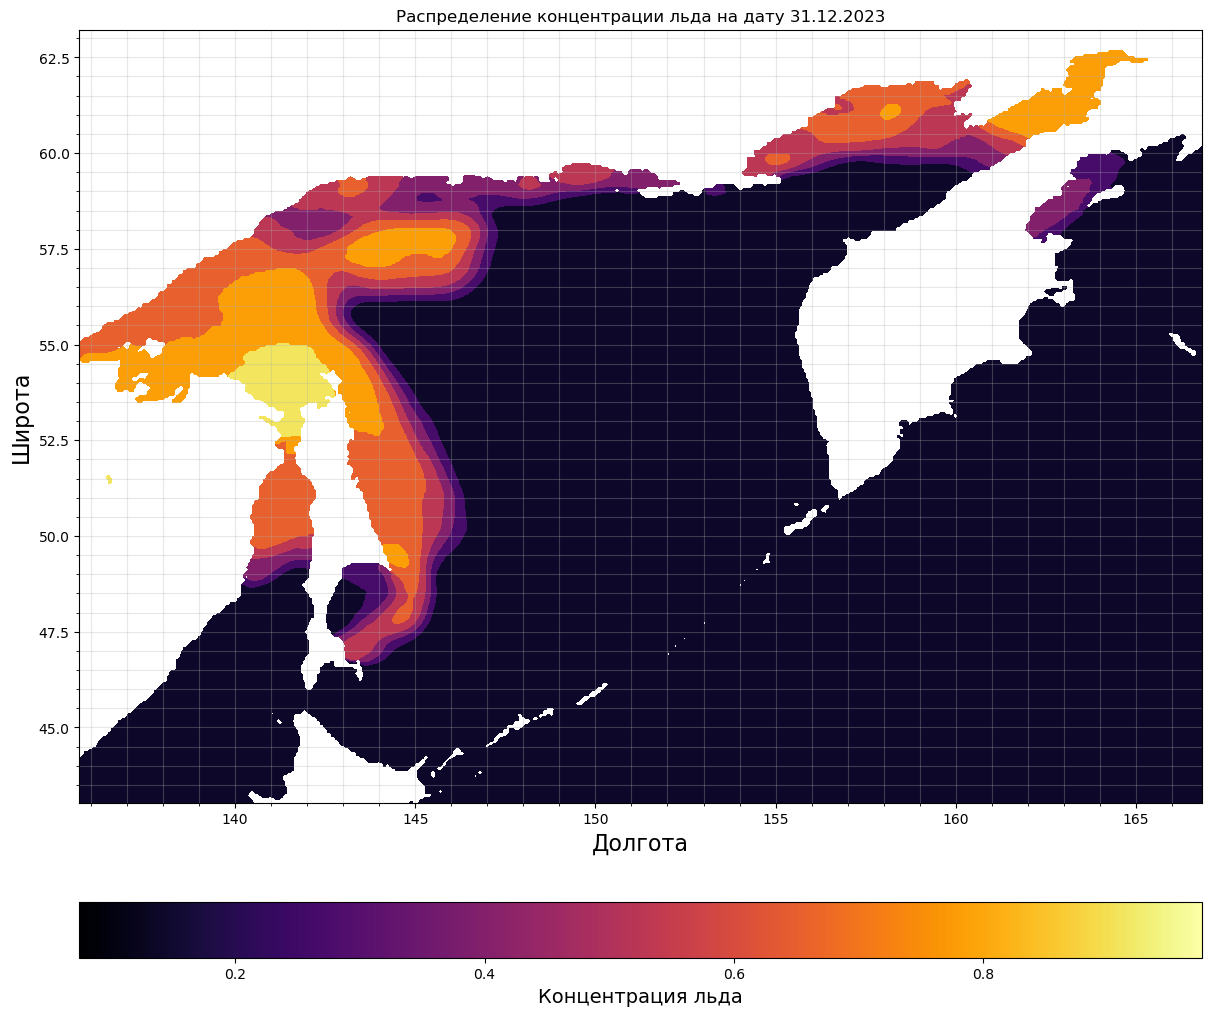

In [14]:
ax = plt.figure(figsize=(12,10), layout = 'constrained')
cs = plt.contourf(x,y,z,cmap='inferno')

norm= mpl.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
cb = ax.colorbar(sm,ax=plt.gca(),orientation='horizontal')
cb.set_label('Концентрация льда', fontsize = 14)
plt.xlabel('Долгота', fontsize = 16)
plt.ylabel('Широта', fontsize = 16)
plt.minorticks_on()
plt.grid(which = 'both', alpha = 0.3)
plt.title('Распределение концентрации льда на дату 31.12.2023')
plt.show()